In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Heart Disease data\Heart Disease data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

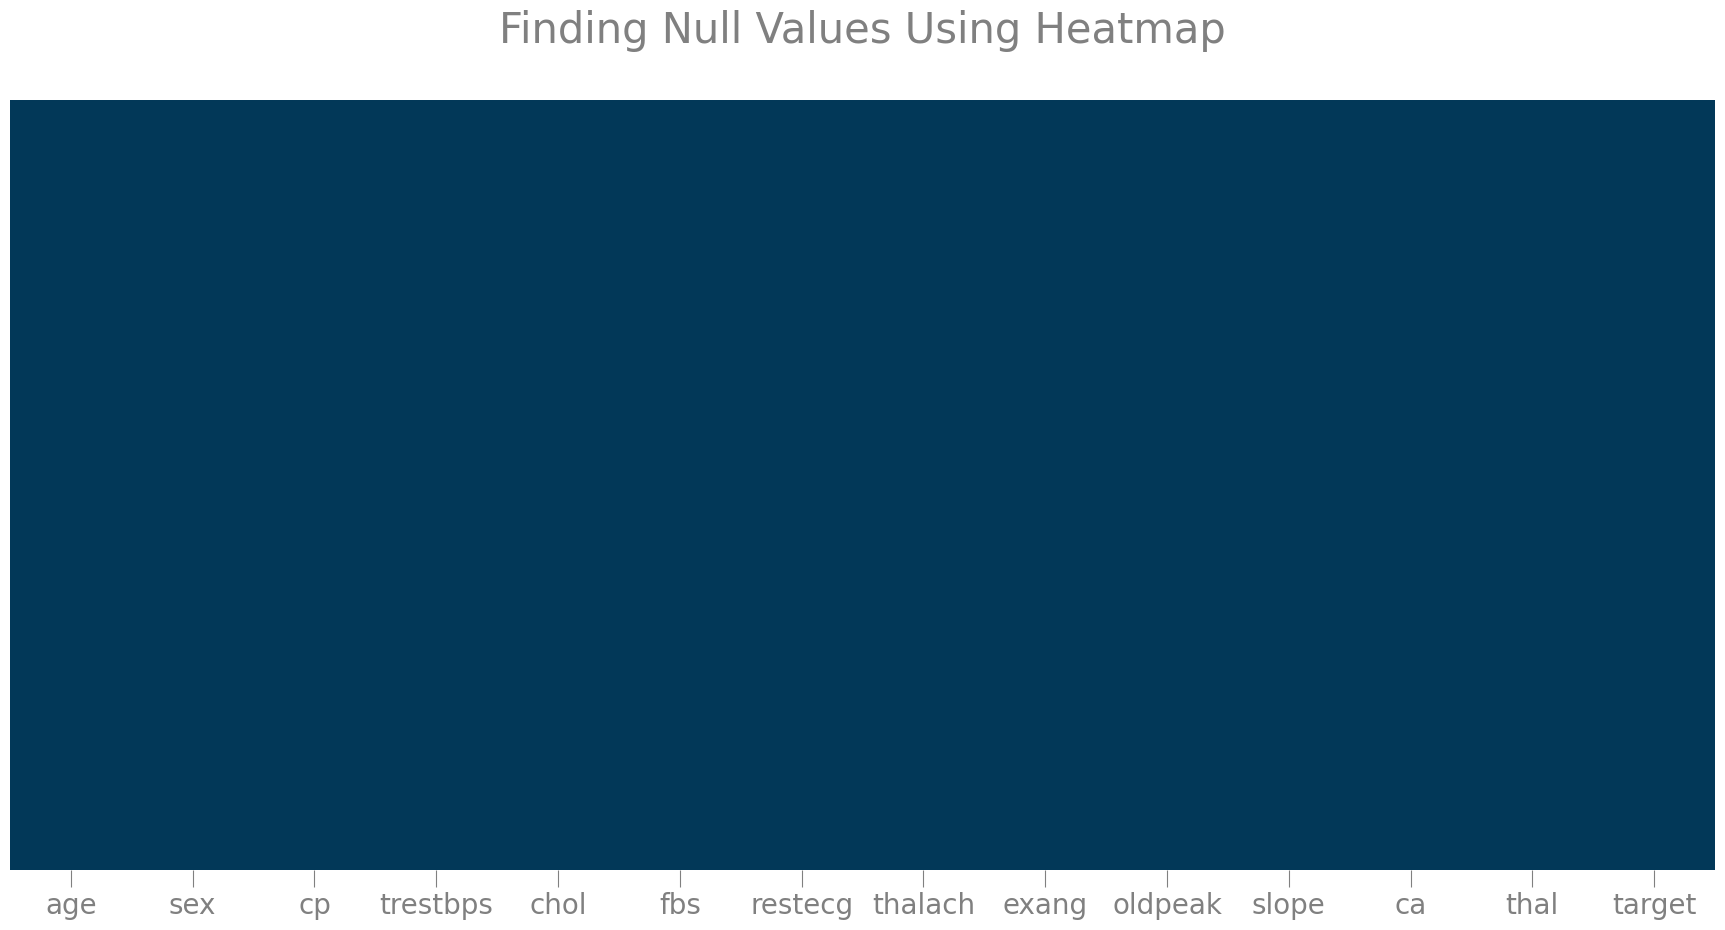

In [6]:
plt.figure(figsize=(22,10))
plt.xticks(size=20, color='grey')
plt.tick_params(size=12, color='grey')
plt.title('Finding Null Values Using Heatmap\n', color='grey', size=30)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='PuBu_r')
plt.show()

In [7]:
if df.isnull().sum().any() == 0:
    print("Dataset has no null values")
else:
    print("Dataset contains null values")

Dataset has no null values


In [8]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df.copy()
X = data.iloc[:, 0:13]  # Independent columns
y = data.iloc[:, -1]    # Target column

In [9]:
# Apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns

# Print best features
print(featureScores.nlargest(12, 'Score'))

       Specs       Score
7    thalach  650.008493
9    oldpeak  253.653461
2         cp  217.823922
11        ca  210.625919
8      exang  130.470927
4       chol  110.723364
0        age   81.425368
3   trestbps   45.974069
10     slope   33.673948
1        sex   24.373650
12      thal   19.373465
6    restecg    9.739343


In [10]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)  # Use inbuilt class feature_importances of tree based classifiers


[0.06925608 0.05638724 0.11411754 0.06032298 0.06117819 0.02082909
 0.03532383 0.08415476 0.09953258 0.09157501 0.07016849 0.13144329
 0.10571092]


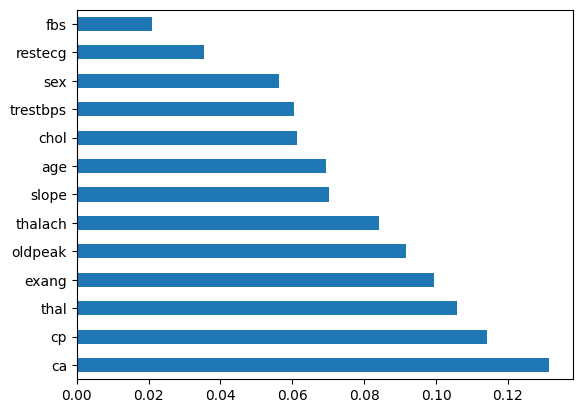

In [11]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

<Axes: >

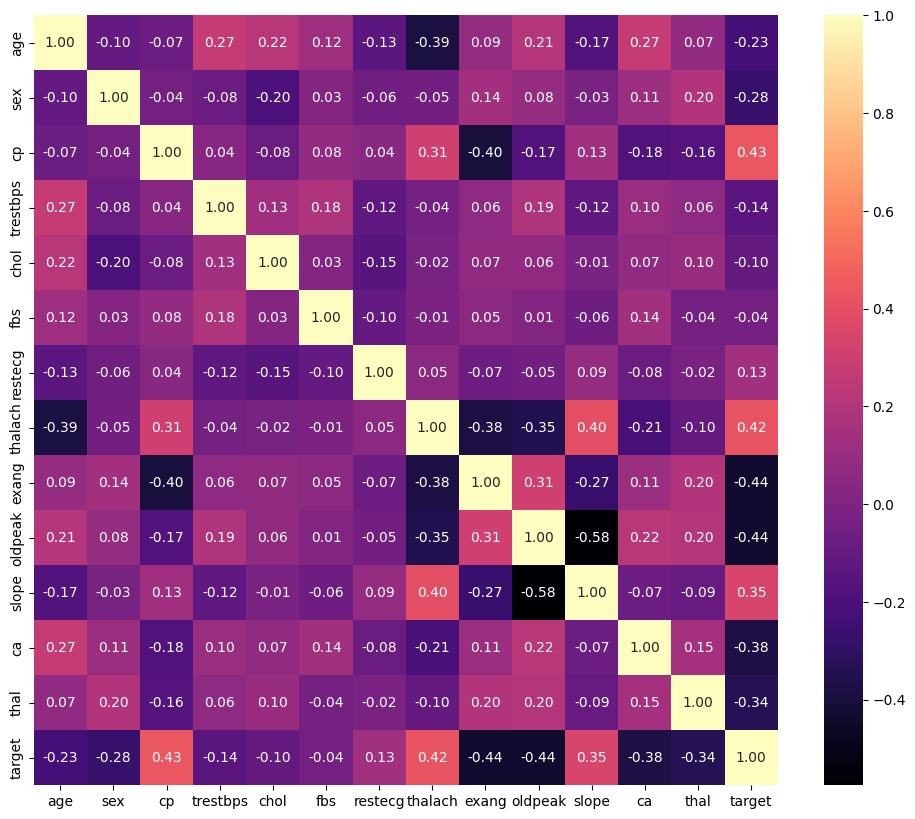

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="magma", fmt='.2f')


In [13]:
for i in df.columns:
    print(i, len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [14]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [15]:
# Preparing Data
df2 = df.copy()

def chng(sex):
    return 'female' if sex == 0 else 'male'

df2['sex'] = df2['sex'].apply(chng)

def chng2(prob):
    return 'Heart Disease' if prob == 0 else 'No Heart Disease'

df2['target'] = df2['target'].apply(chng2)

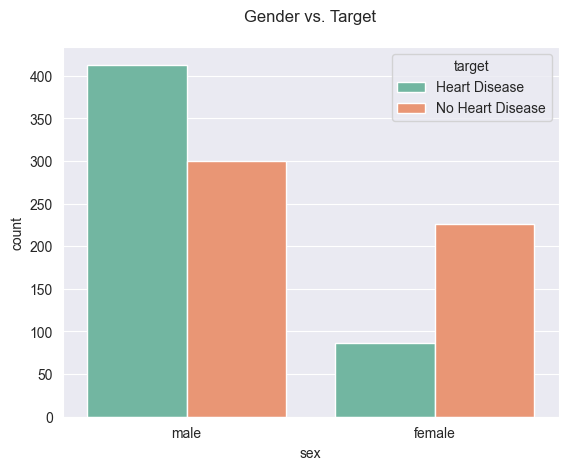

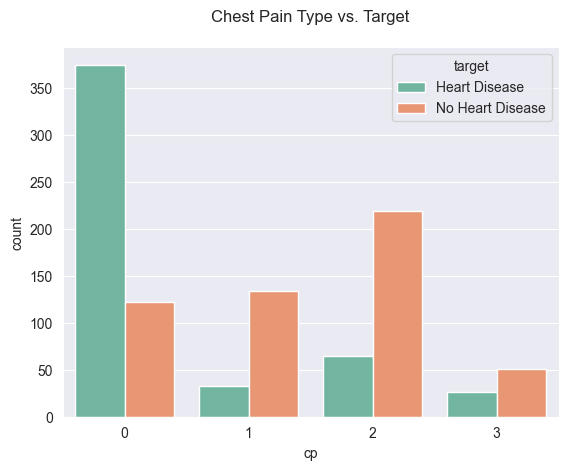

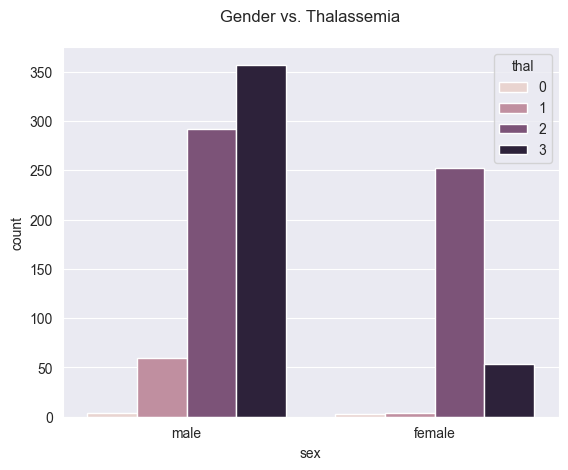

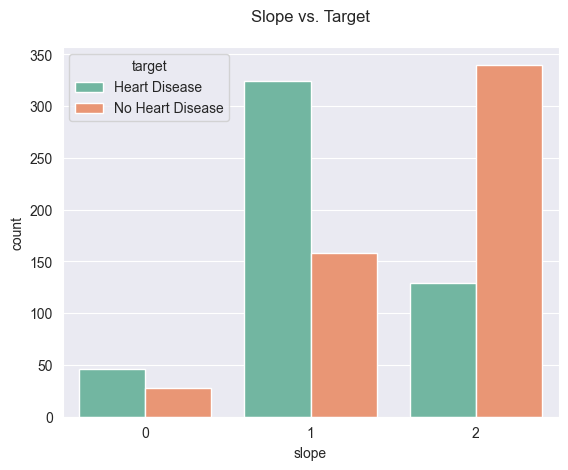

In [16]:
# Countplot
sns.countplot(data=df2, x='sex', hue='target')
plt.title('Gender vs. Target\n')
plt.show()

sns.countplot(data=df2, x='cp', hue='target')
plt.title('Chest Pain Type vs. Target\n')
plt.show()

sns.countplot(data=df2, x='sex', hue='thal')
plt.title('Gender vs. Thalassemia\n')
plt.show()

sns.countplot(data=df2, x='slope', hue='target')
plt.title('Slope vs. Target\n')
plt.show()

C:\Users\Priya Singh\AppData\Local\Temp\ipykernel_18324\2551506737.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == 0]['age'], kde=False, bins=50)
C:\Users\Priya Singh\AppData\Local\Temp\ipykernel_18324\2551506737.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['t

Text(0.5, 1.0, 'Thalach of Heart Diseased Patients\n')

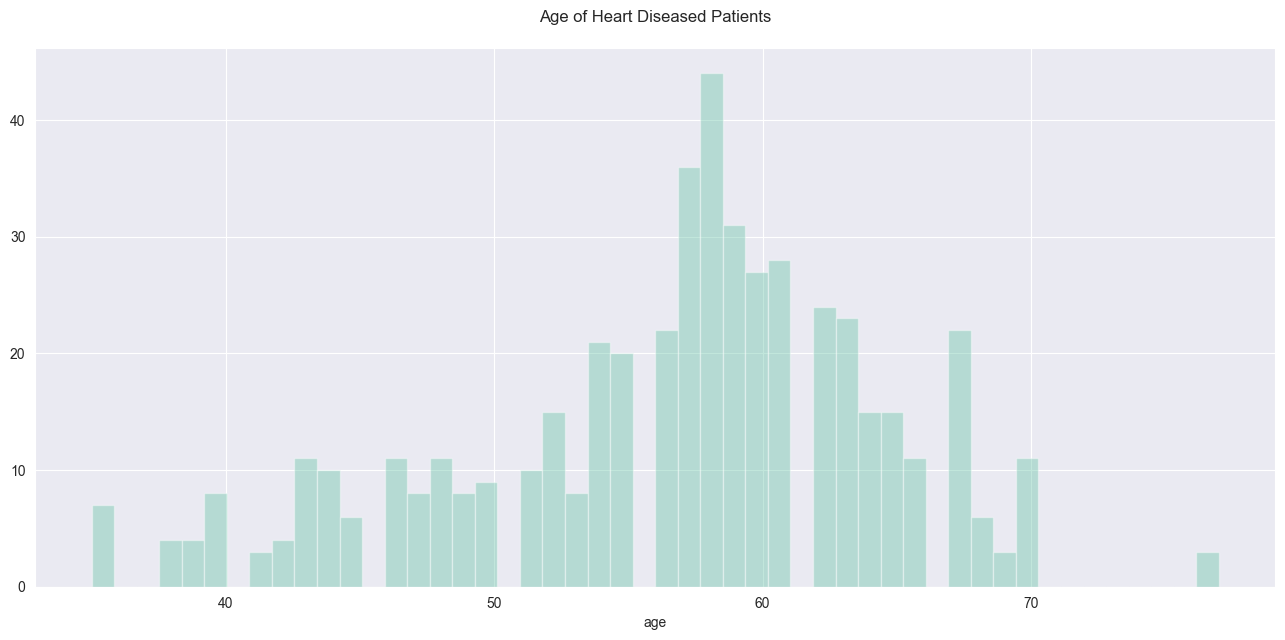

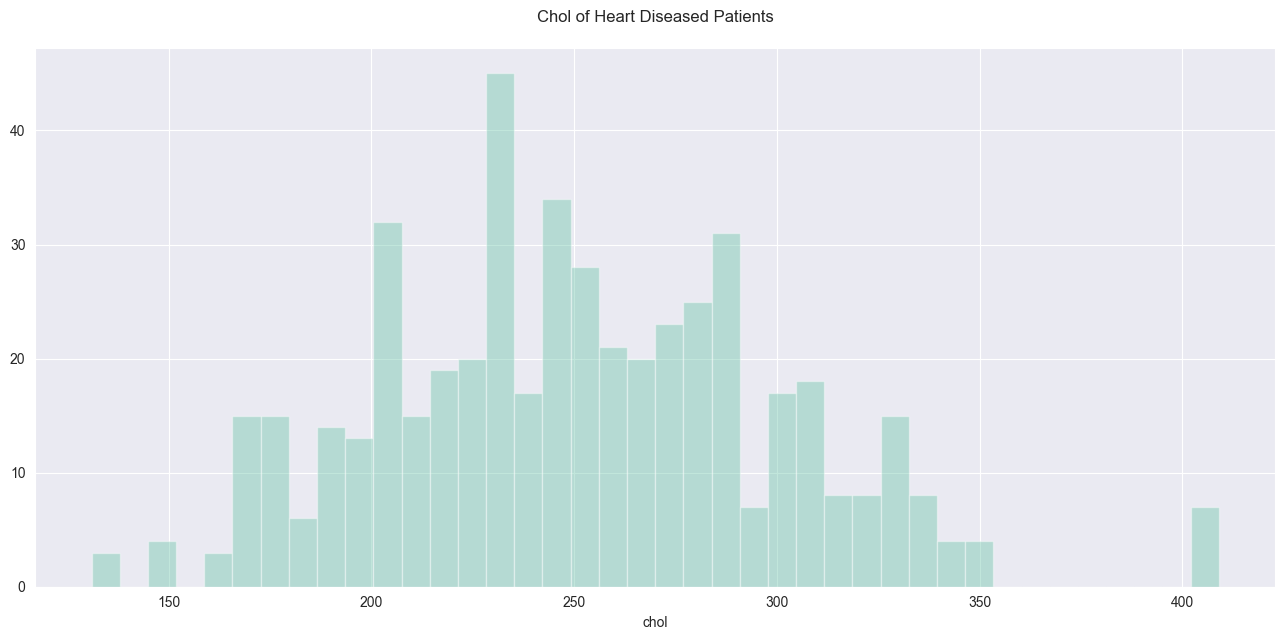

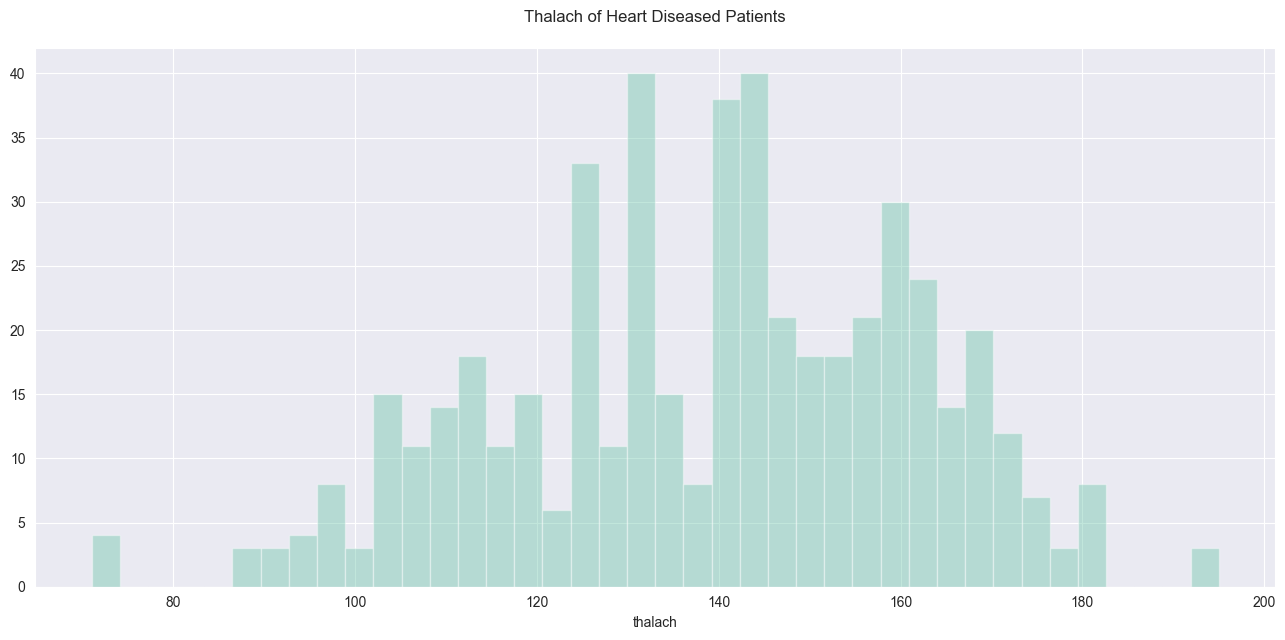

In [17]:
# 2. Distplot
plt.figure(figsize=(16,7))
sns.distplot(df[df['target'] == 0]['age'], kde=False, bins=50)
plt.title('Age of Heart Diseased Patients\n')

plt.figure(figsize=(16,7))
sns.distplot(df[df['target'] == 0]['chol'], kde=False, bins=40)
plt.title('Chol of Heart Diseased Patients\n')

plt.figure(figsize=(16,7))
sns.distplot(df[df['target'] == 0]['thalach'], kde=False, bins=40)
plt.title('Thalach of Heart Diseased Patients\n')


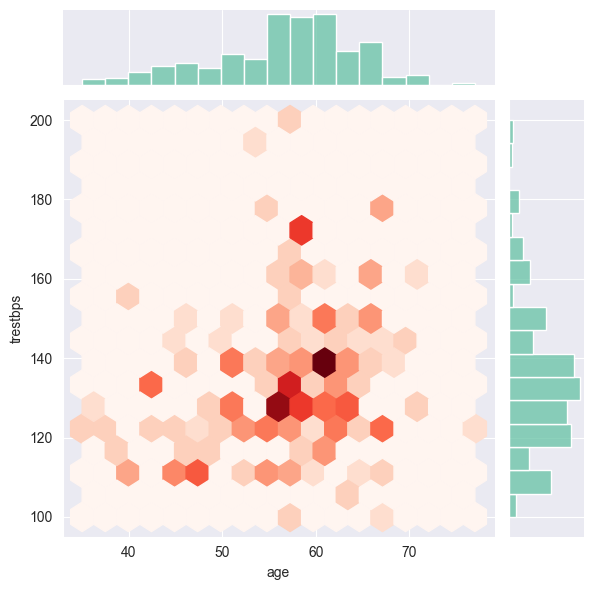

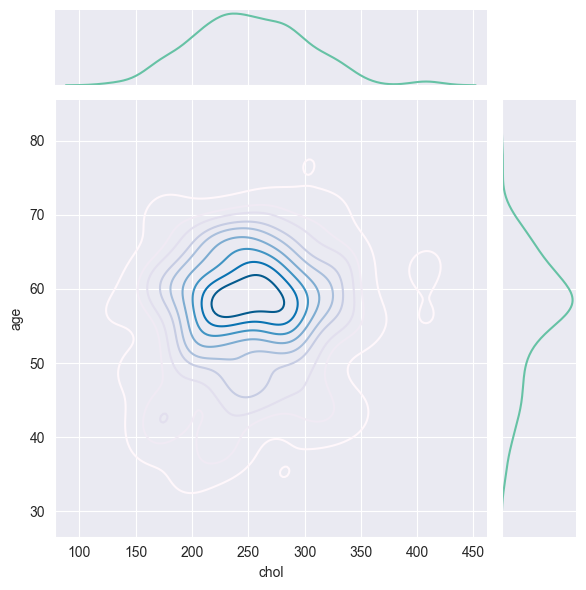

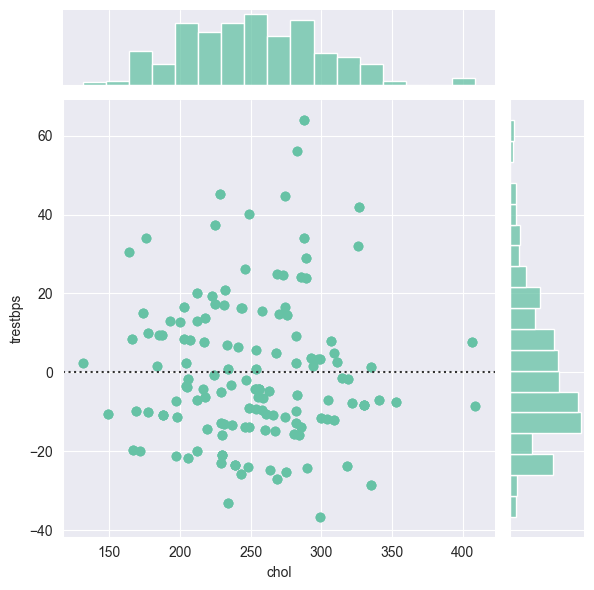

In [18]:
# 3. Jointplot
df3 = df[df['target'] == 0][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] 

sns.jointplot(data=df3, x='age', y='trestbps', kind='hex', cmap='Reds')
sns.jointplot(data=df3, x='chol', y='age', kind='kde', cmap='PuBu')
sns.jointplot(data=df3, x='chol', y='trestbps', kind='resid')


<Axes: xlabel='slope', ylabel='thalach'>

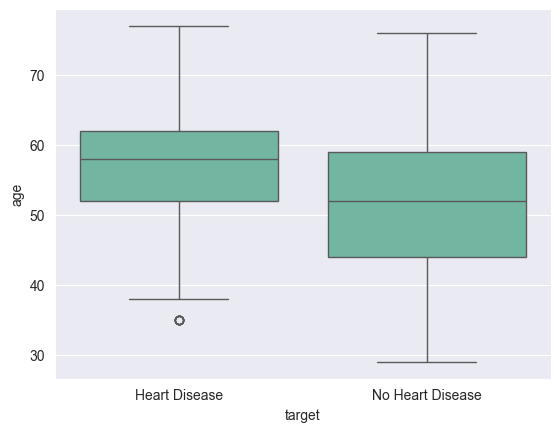

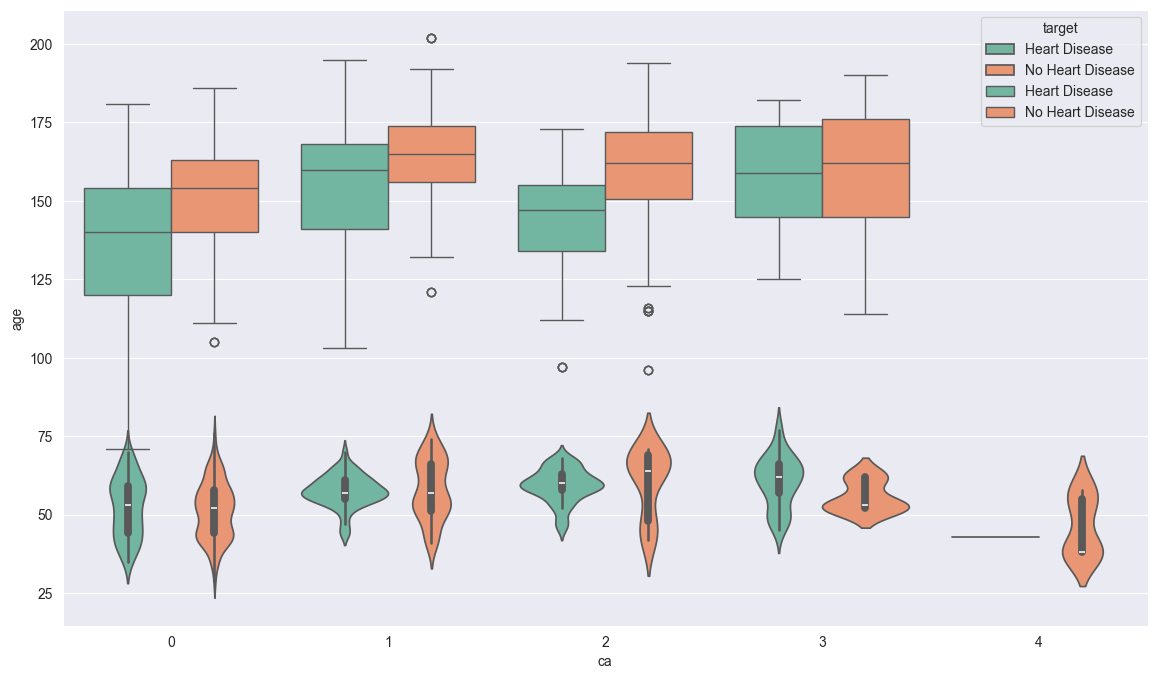

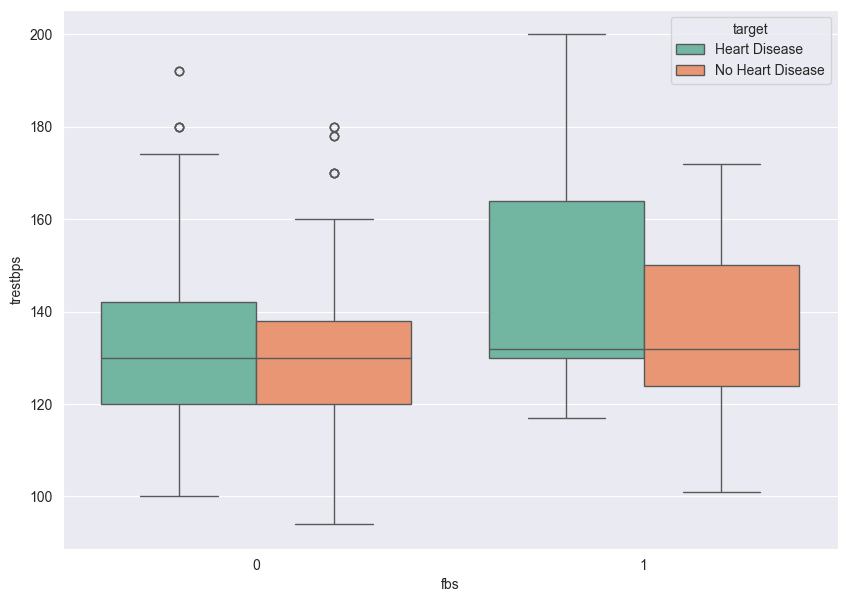

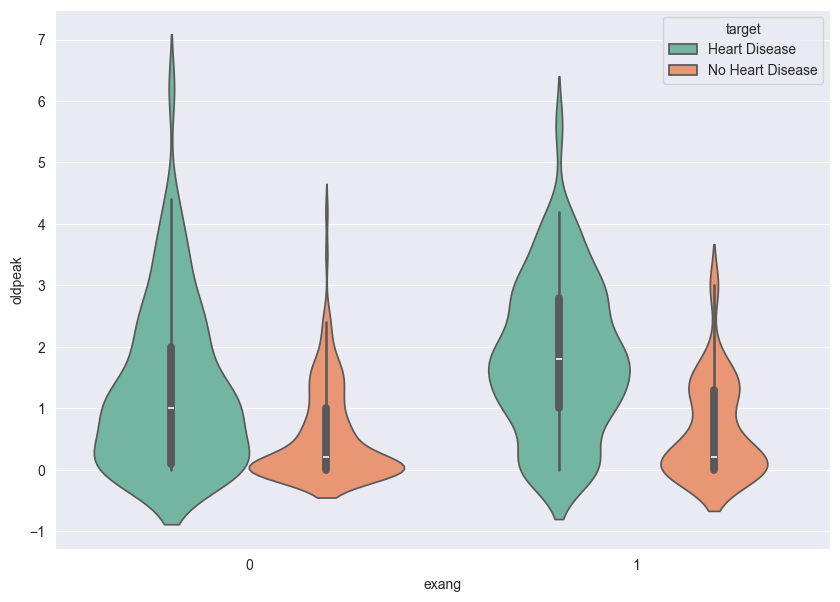

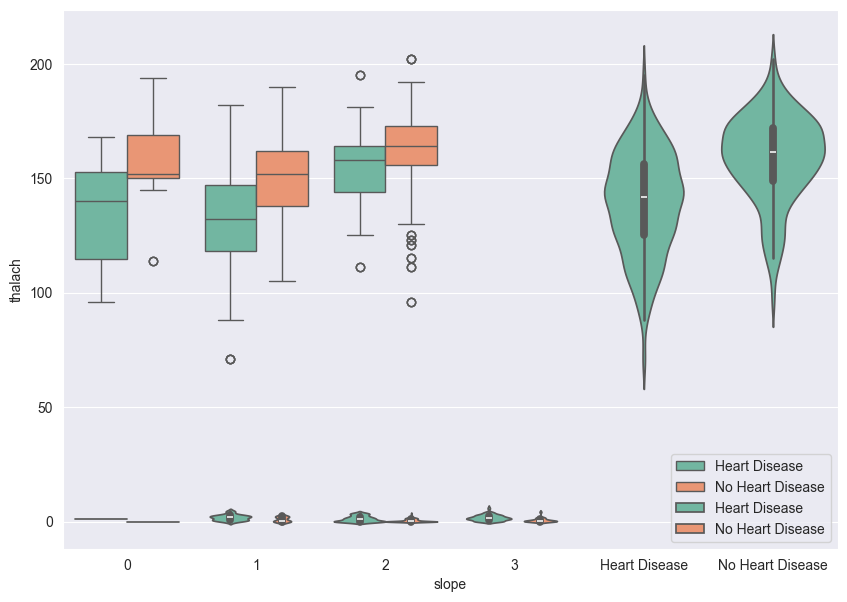

In [19]:
# 4. Boxplot / Violinplot
sns.boxplot(data=df2, x='target', y='age')

plt.figure(figsize=(14,8))
sns.violinplot(data=df2, x='ca', y='age', hue='target')

sns.boxplot(data=df2, x='cp', y='thalach', hue='target')

plt.figure(figsize=(10,7))
sns.boxplot(data=df2, x='fbs', y='trestbps', hue='target')

plt.figure(figsize=(10,7))
sns.violinplot(data=df2, x='exang', y='oldpeak', hue='target')

plt.figure(figsize=(10,7))
sns.boxplot(data=df2, x='slope', y='thalach', hue='target')

sns.violinplot(data=df2, x='thal', y='oldpeak', hue='target')

sns.violinplot(data=df2, x='target', y='thalach')

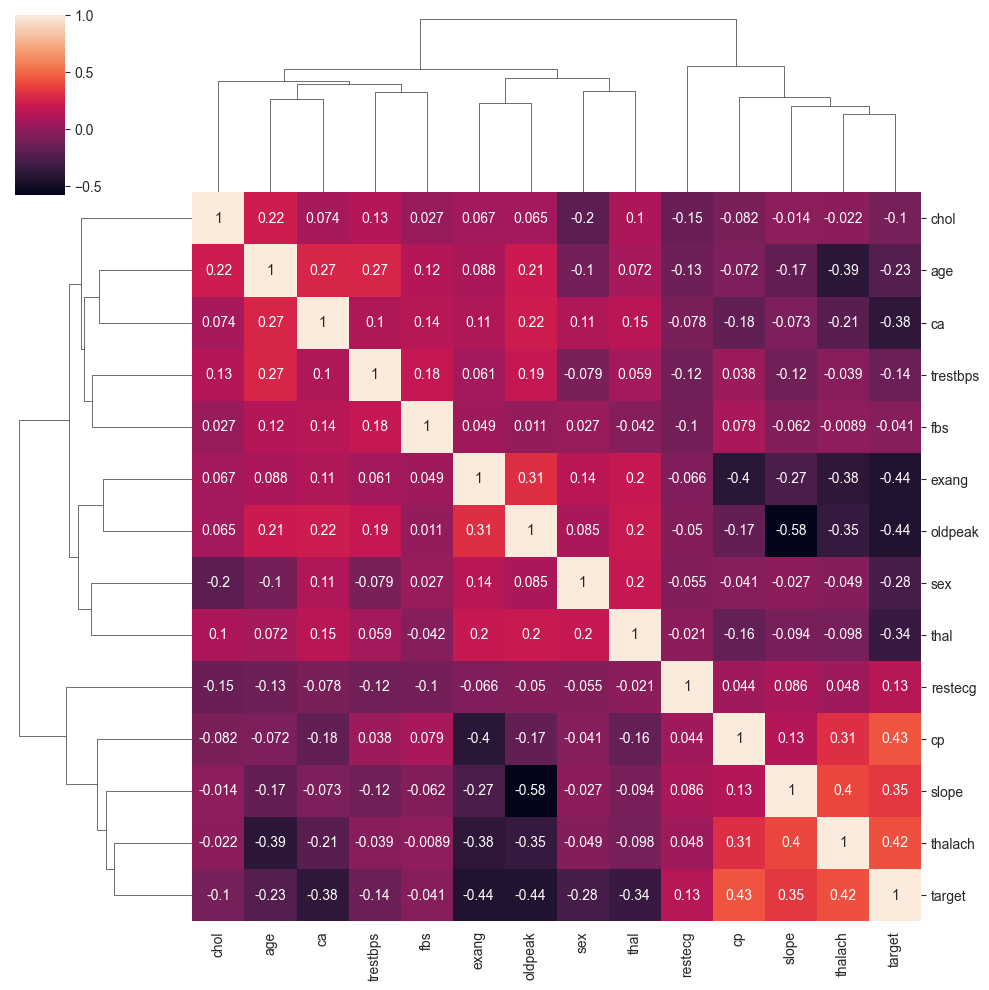

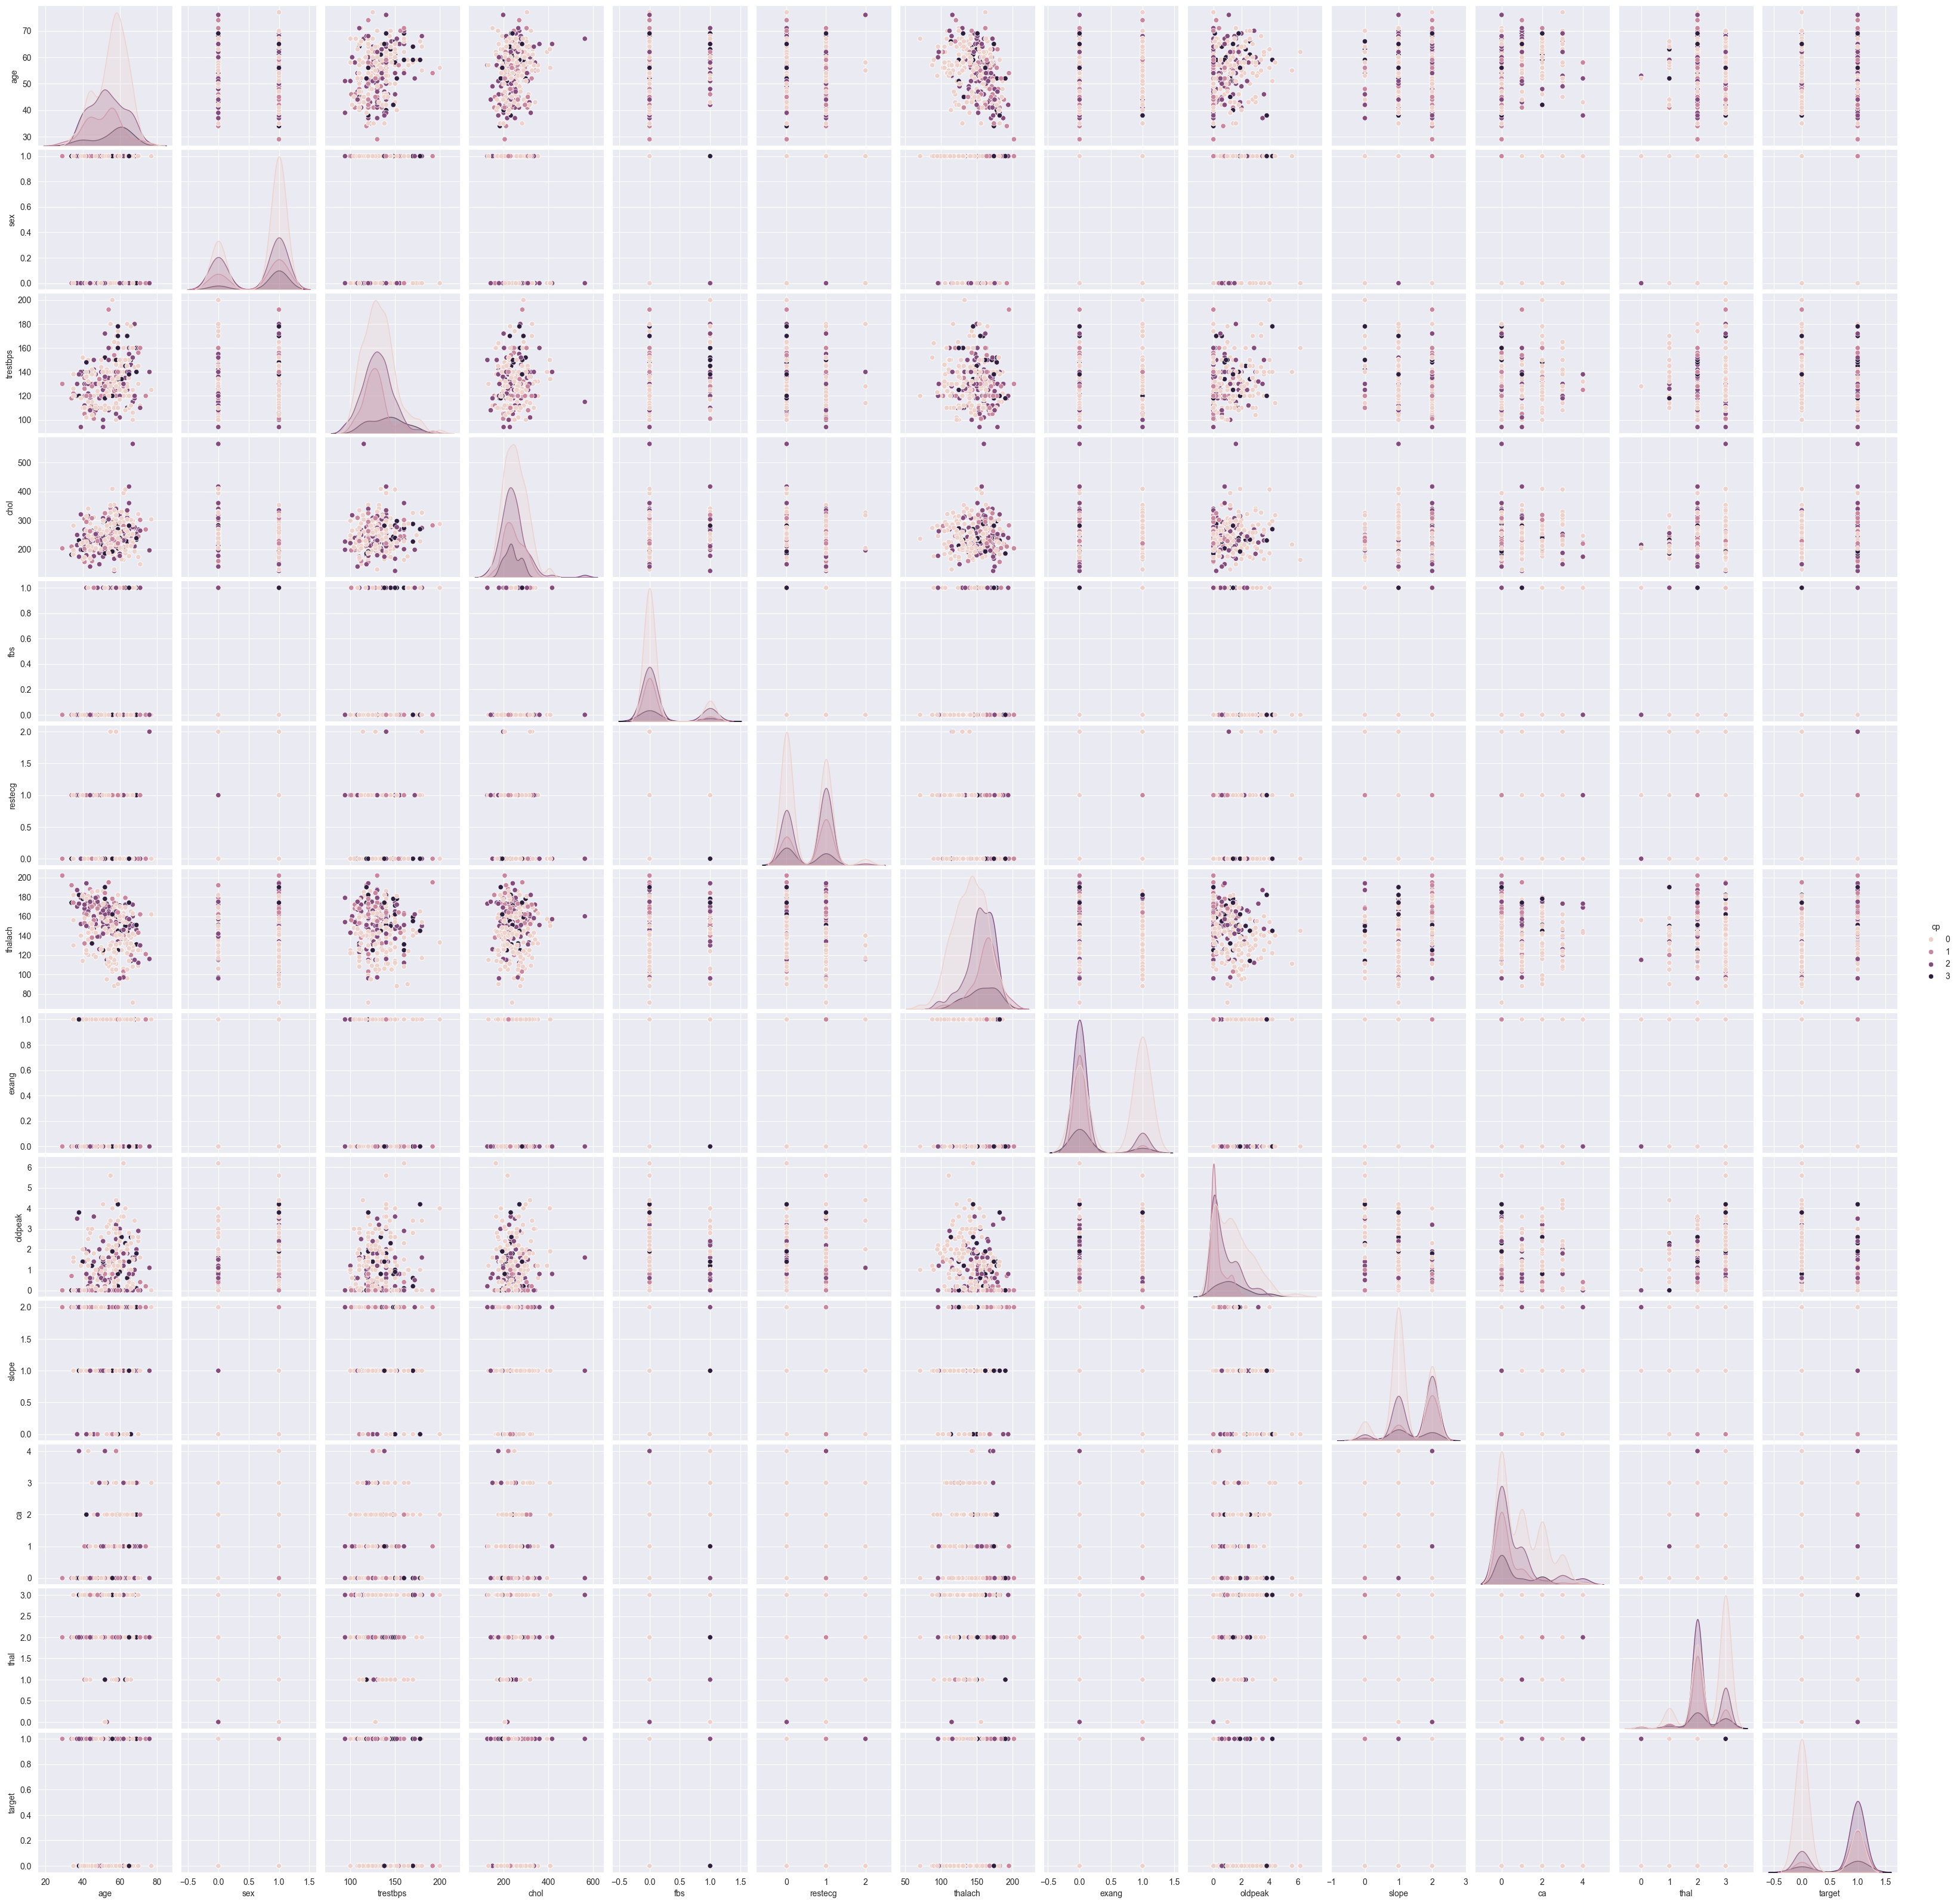

In [20]:
# 5. Clusterplot
sns.clustermap(df.corr(), annot=True)

# 6. Pairplot
sns.pairplot(df, hue='cp')

In [21]:
# Classification Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.iloc[:, 0:13] # Features
y = df.iloc[:, 13]   # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)

In [22]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9902597402597403


In [29]:
! pip install pydotplus





[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
! pip install graphviz


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# Plot Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart_disease.png')
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [37]:
# Create Decision Tree classifier object with criterion="entropy"
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8246753246753247


In [38]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']
df.columns


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [40]:
# cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

# restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

# slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

# thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


C:\Users\Priya Singh\AppData\Local\Temp\ipykernel_18324\3230698920.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'asymptomatic' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
C:\Users\Priya Singh\AppData\Local\Temp\ipykernel_18324\3230698920.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left ventricular hypertrophy' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
C:\Users\Priya Singh\AppData\Local\Temp\ipykernel_18324\3230698920.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'downsloping' has dtype incompatible with int64, pl

In [41]:
data = pd.get_dummies(df, drop_first=False)
df_temp = data['thalassemia_type_fixed defect']
data = pd.get_dummies(df, drop_first=True)

# Drop 'thalassemia_type_nothing' and concatenate 'thalassemia_type_fixed defect'
result = pd.concat([data, df_temp], axis=1)
result.drop('thalassemia_type_nothing', axis=1, inplace=True)
resultc = result.copy()  # Making a copy for further analysis


In [42]:
X = result.drop('target', axis=1)
y = result['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [44]:
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))


In [45]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train, y_train)
y_pred = logre.predict(X_test)


Accuracy: 0.6682926829268293
              precision    recall  f1-score   support

           0       0.79      0.42      0.55        98
           1       0.63      0.90      0.74       107

    accuracy                           0.67       205
   macro avg       0.71      0.66      0.64       205
weighted avg       0.70      0.67      0.65       205

ROC AUC Score: 0.6577818043105093


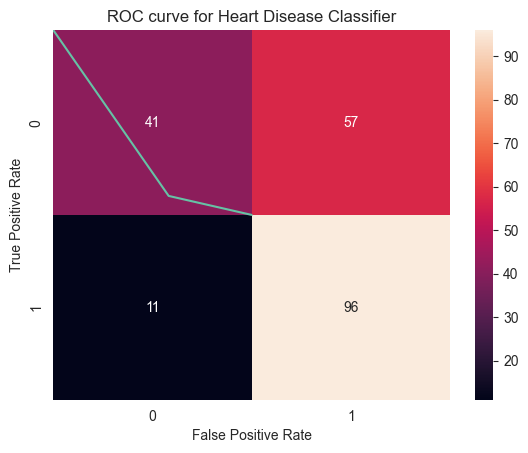

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


[-0.34272509]


<Axes: >

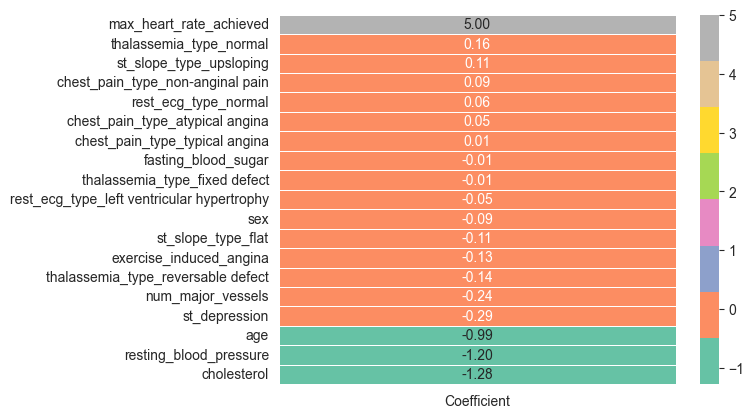

In [47]:
print(logre.intercept_)
coefficients = pd.DataFrame(logre.coef_.ravel(), X.columns)
coefficients.columns = ['Coefficient']
coefficients.sort_values(by=['Coefficient'], inplace=True, ascending=False)
sns.heatmap(coefficients, annot=True, fmt='.2f', cmap='Set2', linewidths=0.5)
